# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

#### By Grace Cho

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has larger variance than GPA, meaning the differences between mean and each values are larger for GRE. For example, looking at the maximum values of gre and gpa, we can see that gre has a much larger difference when it is compared with the mean (i.e. 800 vs. 588).

#### Question 4. Drop data points with missing data


In [7]:
missing = np.where(df_raw["gre"].isnull() == True)
print missing

(array([187, 212]),)


In [8]:
df_new = df_raw.dropna(how = 'any') # drop any values with NA

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [9]:
missing = np.where(df_new.isnull() == True)
print missing

(array([], dtype=int64), array([], dtype=int64))


In [10]:
df_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [11]:
df_new.mean()

admit         0.317380
gre         587.858942
gpa           3.392242
prestige      2.488665
dtype: float64

In [12]:
df_new.std()

admit         0.466044
gre         115.717787
gpa           0.380208
prestige      0.947083
dtype: float64

Answer: 'Missing' now shows no element in the array (where there are null values). Also, the count of each variable is now 397, as I dropped 'any' values with NA.

#### Question 6. Create box plots for GRE and GPA

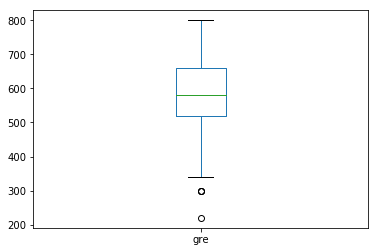

In [23]:
#boxplot 1
df_new['gre'].plot(kind = 'box')

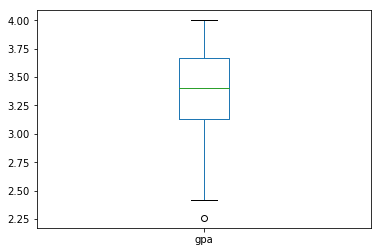

In [25]:
#boxplot 2 
df_new['gpa'].plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: These plots show that there are outliers for both variables in the lower value ranges. Additionally, we can see that the range (max - min) is much smaller for 'gpa' variable compared to the 'gre' variable even though the box plots look similar in proportion.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1197f2a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119a1b590>]], dtype=object)

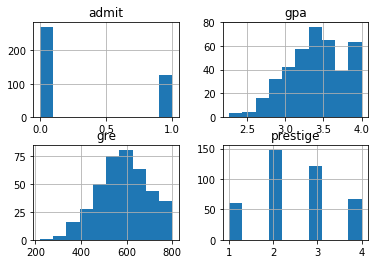

In [17]:
df_new.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c08b350>]], dtype=object)

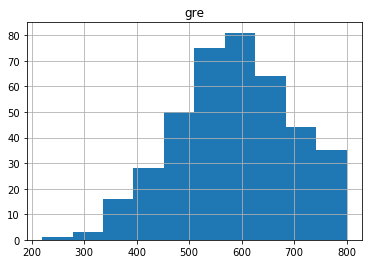

In [78]:
# plot the distribution of each variable 

df_new.hist(column ='gre')

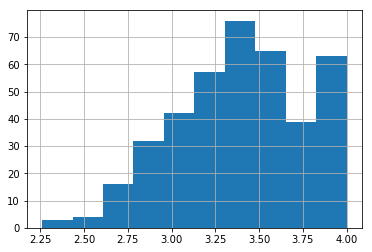

In [27]:
df_new['gpa'].hist()

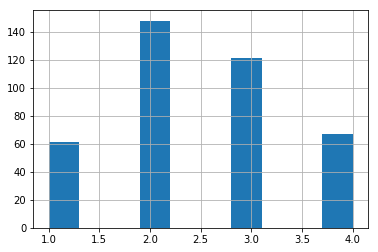

In [36]:
df_new['prestige'].hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: It depends on the variable. For prestige and gre, we can see a normal distribution (symmetrical pattern) but in regards to the gpa variable, we can see a negative skew.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, we would need to correct the distribution for gpa. Reason being, when we build a simple linear regression model, it will work best when data is normally distributed. To correct the distribution, we would apply logarithmic transformation on gpa variable before feeding it to the model.

#### Question 11. Which of our variables are potentially colinear? 

In [79]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


Answer: Potential colinear variables are gpa and gre.

#### Question 12. What did you find?

Answer: As we can see above, the variables have relatively low correlation coefficients with one another. One exception is gre and gpa, which has a correlation of 0.38.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Analysis plan for exploring the association between grad school admission rates and prestige of undergraduate schools is as follows.

- First I will refine the data, by identifying trends and outliers for both variables (admission rates and prestige). Then I will apply descriptive and inferential statstics to have a better understanding of the data. If necessary, I will document and transform the data.

- Next, I will build a simple linear regression model and evaluate the association between admission rates and prestige. In this model, admission will be the output variable (y) and prestige will be the input variable (x).

- Looking at OLS regression results, I will evaluate whether or not the 2 variables display an association. After summarizing findings with storytelling techniques, I will present limitations and assumptions of the analysis. Finally, I will identify follow up problems and questions for next analysis.



#### Question 14. What is your hypothesis? 

Answer: The hypothesis is that higher level prestige of undegraduate schools is strongly associated with higher grad school admission rates.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [82]:
# instead of dropping observations, here we substitute them with median of gre variable
new_gre_var = np.where(df_raw['gre'].isnull(), 
                       df_raw['gre'].median(), 
                       df_raw['gre'])

df_raw['gre'] = new_gre_var

#### 2. Bonus: Log transform the skewed data

In [84]:
log_column = ['gpa']
log_raw = df_raw.copy()
log_raw[log_column] = log_raw[log_column].apply(np.log10)

#### 3. Advanced: Impute missing data